In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, auc, RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.utils import resample

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score

## Business Understanding Statement:

The Binary Diabetes Health Indicators provides an understanding of different health indicators that can impact the risk of diabetes and prediabetes among a general population. By analyzing different factors such as high blood pressure, cholesterol levels, physical activity, reported general health, diatery habits, and income, healthcare providers can identify high-risk individuals and recommend preventive measures and interventions. his information is critical for developing targeted health programs, improving patient outcomes, and reducing the overall burden of diabetes on the healthcare system. The dataset's detailed health metrics and demographic information offer valuable insights for creating effective health strategies and promoting healthier lifestyles.


## Description of the Diabetes Dataset
This dataset comprises various health indicators and demographic information for patients, focusing on diabetes risk assessment. Each entry is uniquely identified by a patient ID. The main target variable is Diabetes_binary, indicating whether a patient has diabetes or prediabetes. The dataset includes the following features:

* Binary Health Indicators:
* HighBP: High blood pressure (0 = no, 1 = yes)
* HighChol: High cholesterol (0 = no, 1 = yes)
* CholCheck: Cholesterol check in the past 5 years (0 = no, 1 = yes)
* Smoker: Smoking history (0 = no, 1 = yes)
* Stroke: History of stroke (0 = no, 1 = yes)
* HeartDiseaseorAttack: Coronary heart disease or myocardial infarction (0 = no, 1 = yes)
* PhysActivity: Physical activity in the past 30 days, excluding job-related activities (0 = no, 1 = yes)
* Fruits: Daily fruit consumption (0 = no, 1 = yes)
* Veggies: Daily vegetable consumption (0 = no, 1 = yes)
* HvyAlcoholConsump: Heavy alcohol consumption (0 = no, 1 = yes)
* AnyHealthcare: Access to healthcare (0 = no, 1 = yes)
* NoDocbcCost: Could not see a doctor due to cost in the past 12 months (0 = no, 1 = yes)
* DiffWalk: Difficulty walking or climbing stairs (0 = no, 1 = yes)
* Sex: Sex of the patient (0 = female, 1 = male)
* BMI: Body Mass Index
* GenHlth: General health status (1 = excellent to 5 = poor)
* MentHlth: Number of days mental health was not good in the past 30 days (1-30 days)
* PhysHlth: Number of days physical health was not good in the past 30 days (1-30 days)
* Age:
  _AGEG5YR Calculated variable for thirteen-level age category. _AGEG5YR is derived from AGE.
    * 1 Age 18 to 24 Respondents with reported age between 18 and 24 years (18 <= AGE <= 24)
    * 2 Age 25 to 29 Respondents with reported age between 25 and 29 years (25 <= AGE <= 29)
    * 3 Age 30 to 34 Respondents with reported age between 30 and 34 years (30 <= AGE <= 34)
    * 4 Age 35 to 39 Respondents with reported age between 35 and 39 years (35 <= AGE <= 39)
    * 5 Age 40 to 44 Respondents with reported age between 40 and 44 years (40 <= AGE <= 44)
    * 6 Age 45 to 49 Respondents with reported age between 45 and 49 years (45 <= AGE <= 49)
    * 7 Age 50 to 54 Respondents with reported age between 50 and 54 years (50 <= AGE <= 54)
    * 8 Age 55 to 59 Respondents with reported age between 55 and 59 years (55 <= AGE <= 59)
    * 9 Age 60 to 64 Respondents with reported age between 60 and 64 years (60 <= AGE <= 64)
    * 10 Age 65 to 69 Respondents with reported age between 65 and 69 years (65 <= AGE <= 69)
    * 11 Age 70 to 74 Respondents with reported age between 70 and 74 years (70 <= AGE <= 74)
    * 12 Age 75 to 79 Respondents with reported age between 75 and 79 years (75 <= AGE <= 79)
    * 13 Age 80 or older Respondents with reported age between 80 and 99 years (80 <= AGE <= 99)
* Education: Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
* Income: Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more


**There are no missing values in the dataset, making it ready for analysis and prediction tasks related to diabetes risk.**

In [6]:
diabetes = pd.read_csv('data/diabetes_binary_health_indicators_BRFSS2015.csv')

In [7]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Data Cleaning and Preprocessing: 

In [10]:
missing_values = diabetes.isnull().sum()
print(missing_values)

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


#### There are no NULL values so there is no need to drop missing values.

In [12]:
# Check for duplicates
duplicates = diabetes.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 24206


In [13]:
#There are some duplicate rows so we will drop them.
# Remove duplicates
diabetes.drop_duplicates(inplace=True)

In [14]:
# Summary statistics
diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.00000,229474.000000,229474.000000,229474.000000,229474.000000,...,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,0.152945,0.454343,0.441640,0.959481,28.687507,0.46580,0.044816,0.103336,0.733042,0.612675,...,0.946011,0.092921,2.601820,3.509866,4.681219,0.185751,0.439087,8.085068,4.979741,5.888615
std,0.359936,0.497912,0.496584,0.197173,6.789204,0.49883,0.206899,0.304398,0.442371,0.487140,...,0.225996,0.290323,1.064962,7.717643,9.050877,0.388906,0.496277,3.094451,0.992989,2.092888
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.00000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Exploratory Data Analysis (EDA): 

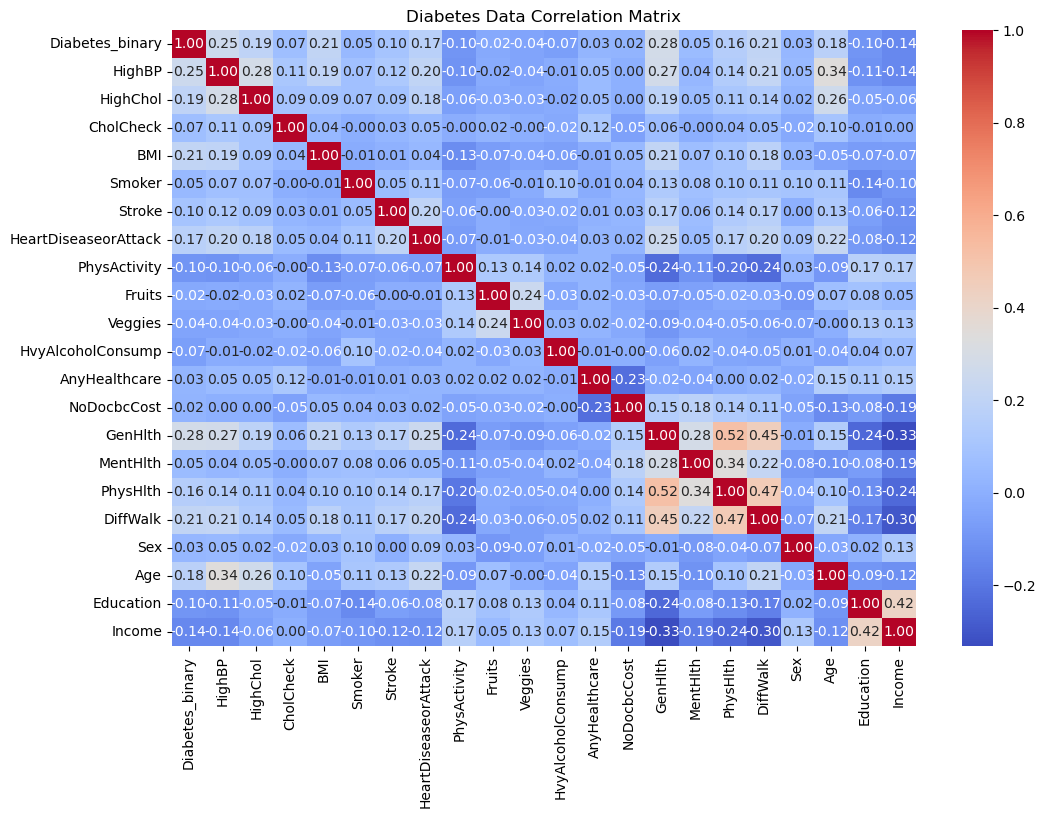

In [17]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(diabetes.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.savefig(f'images/heatmap.png')
plt.title('Diabetes Data Correlation Matrix')
plt.show()

### Analysis of Correlation Matrix

**Features that increased the likelihood of a Patient being Diabetic or Prediabetic**
1. Patients with High Blood Pressure.
2. Patients with High Cholesterol.
3. Patients with High BMI.
4. Patients with Low General Health.
5. Patients who were unable to go to the doctor in the last 12 months due to cost.
6. Patients who have difficulty walking.
7. Patients who are reported smokers.

**Features that decreased the likelihood of a Patient being Diabetic or Prediabetic**
1. Patients with higher income.
2. Patients with mor education.
3. Patients who are physically active.
4. Patients who ate more fruits and vegetables.

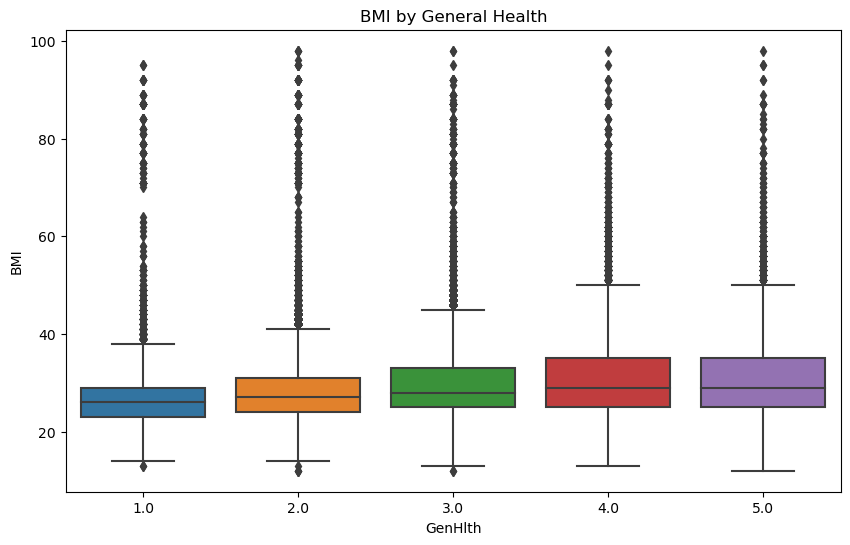

In [19]:
# Box plot for BMI by General Health
plt.figure(figsize=(10, 6))
sns.boxplot(data=diabetes, x='GenHlth', y='BMI')
plt.title('BMI by General Health')
plt.show()

### Analysis of BMI vs General Health Box plot
The values for general health are 1 = excellent to 5 = poor. It is clear that those who say that their general health is excellent have lower BMI while those who claimed poor health have a wider range of BMI - including a lot more values that are in the obese category.


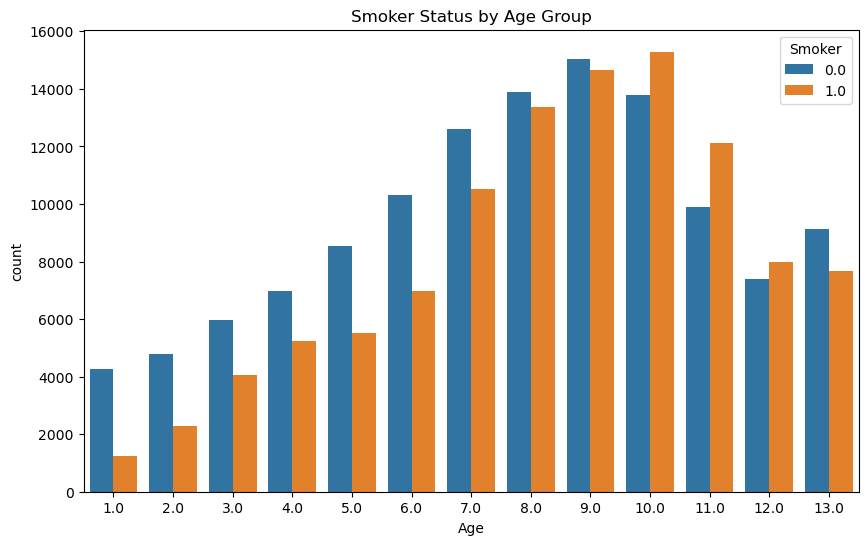

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=diabetes, x=diabetes['Age'], hue='Smoker')
plt.title('Smoker Status by Age Group')
plt.show()

**Analysis of Smoker Status by Age Group**
Looking at this plot it appears that younger patients are less likely to be smokers. Around 8 (55-60) age group - this starts to shift where there are a lot more smokers than non smokers. This is important to note because it might appear that smokers are more likely to be diabetic/prediabetic but since older patients are much more likely to be smokers than younger ones- it could actually be age that impacts diabetes status and not smoking status.


In [23]:
categorical_vars = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
                    'DiffWalk', 'Sex','GenHlth']
continuous_vars = ['BMI', 'Age', 'Income']


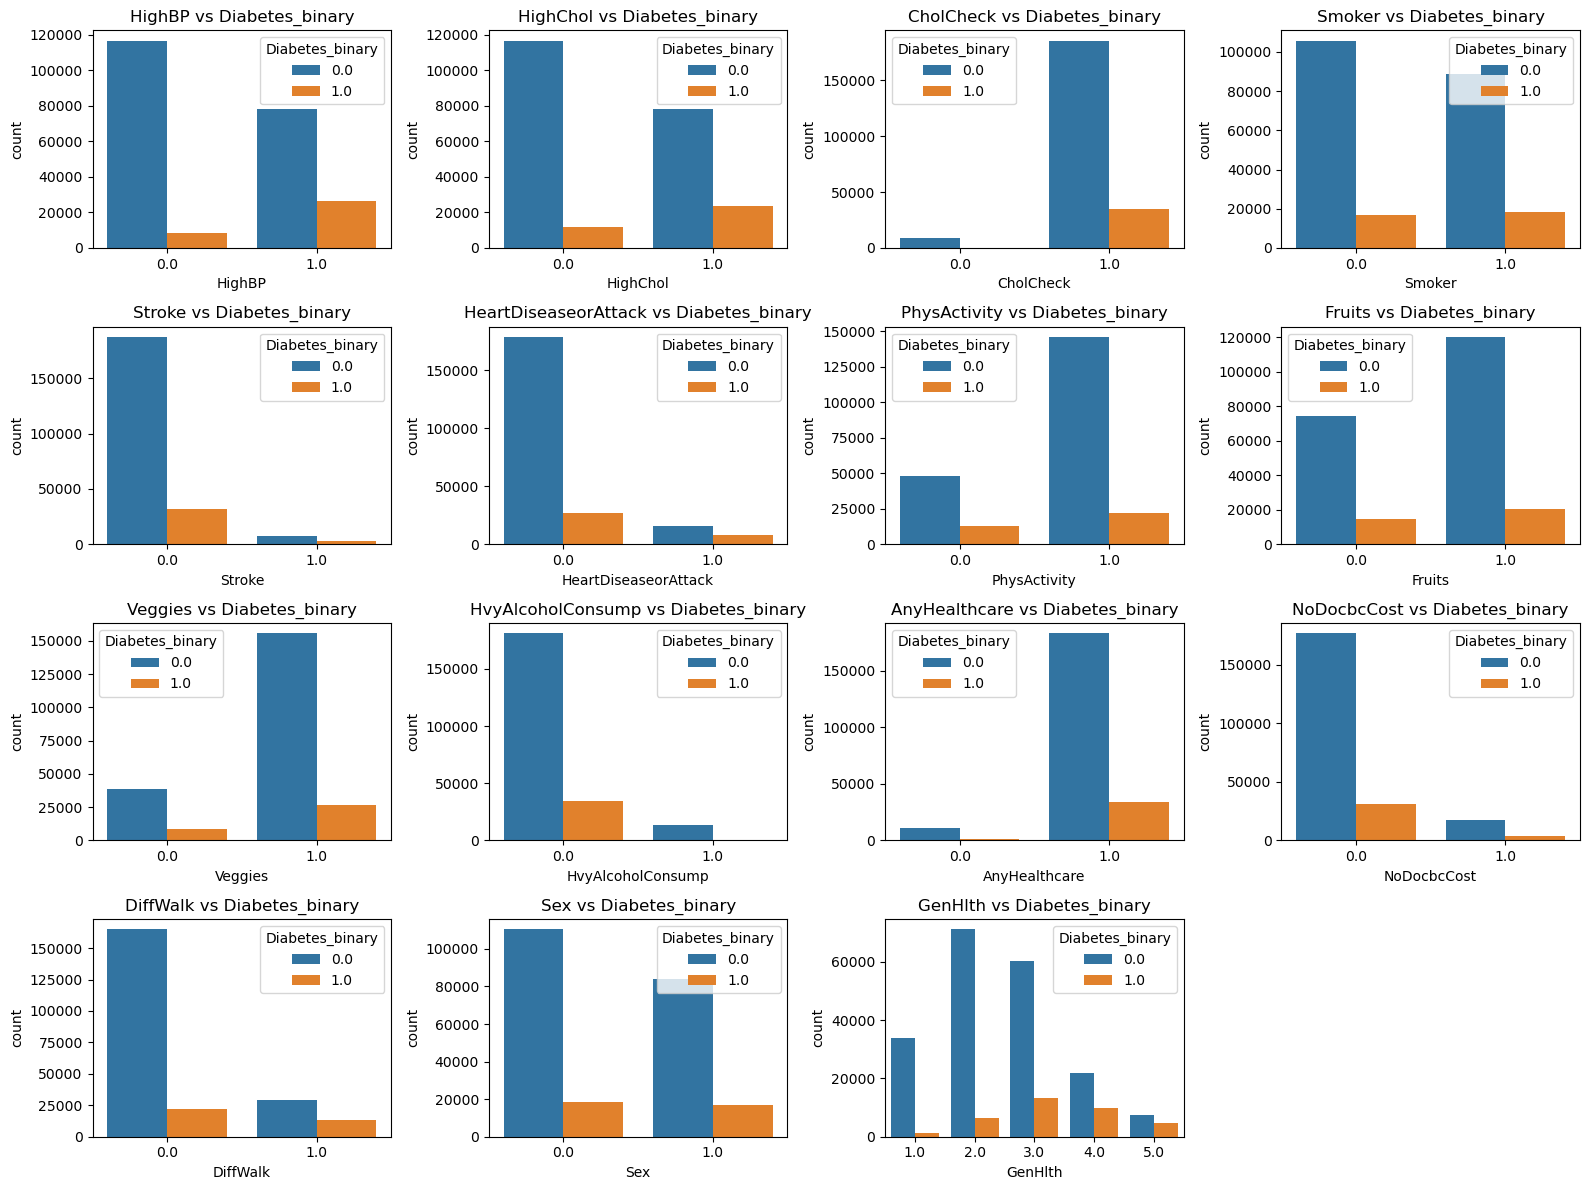

In [24]:
# Categorical variables with respect to target
plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_vars, start=1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, hue='Diabetes_binary', data=diabetes)
    plt.title(f"{col} vs Diabetes_binary")
plt.tight_layout()
plt.savefig(f'images/catcomp.png')
plt.show()

**Analysis of Categorical Values vs Target Variable**

It is clear from these bar plots that there is a substantial imbalance in the target variable with the minority group being those with diabetes/ prediabetes.

The features that we have previously inferred increase the likelihood of diabetes/prediabetes are:

1. Patients with High Blood Pressure.
2. Patients with High Cholesterol.
3. Patients with High BMI.
4. Patients with Low General Health.
5. Patients who were unable to go to the doctor in the last 12 months due to cost.
6. Patients who have difficulty walking.
7. Patients who are reported smokers.

It is interesting to note that because of the huge imbalance it is hard to see if these features actually have the impact predicted or if it is due to the imbalance.

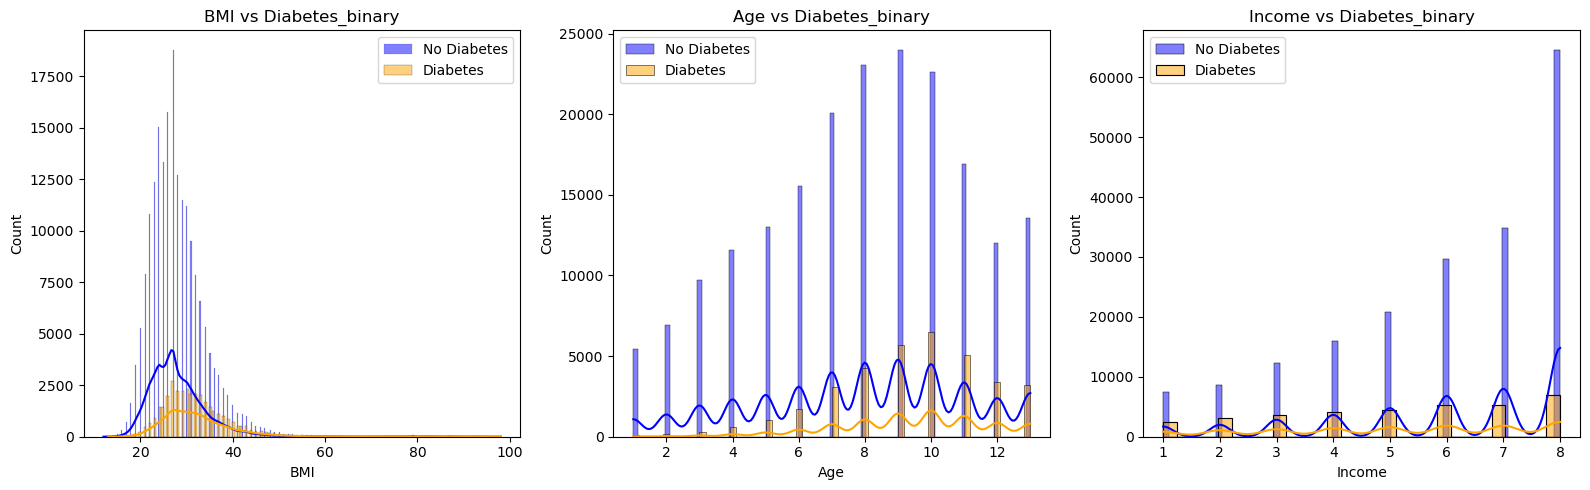

In [26]:
# Continuous variables with respect to target
plt.figure(figsize=(16, 5))
for i, col in enumerate(continuous_vars, start=1):
    plt.subplot(1, 3, i)
    sns.histplot(diabetes[diabetes['Diabetes_binary']==0][col], kde=True, color='blue', label='No Diabetes', alpha=0.5)
    sns.histplot(diabetes[diabetes['Diabetes_binary']==1][col], kde=True, color='orange', label='Diabetes', alpha=0.5)
    plt.title(f"{col} vs Diabetes_binary")
    plt.legend()
plt.tight_layout()
plt.savefig(f'images/contin.png')
plt.show()

### Analysis of Continuous Variables with Respect to Target Variable
Those with higher BMI are more likely to have Diabetes
Those who are in the middle of the age range (7- 10) which is the age group between 50 - 69. This appears to be a non linear relationship. It will be interesting to see if this impacts the modelling results.

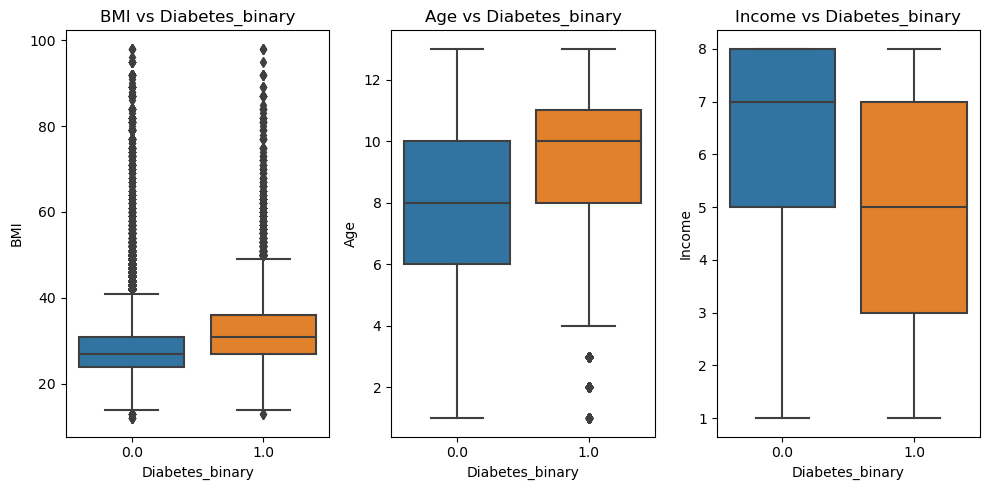

In [28]:
# Boxplot for continuous variables with respect to target
plt.figure(figsize=(10, 5))
for i, col in enumerate(continuous_vars, start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Diabetes_binary', y=col, data=diabetes)
    plt.title(f"{col} vs Diabetes_binary")
plt.tight_layout()
plt.savefig(f'images/boxplot.png')
plt.show()

### Analysis of Continuous Variables with Respect to Target
1. An increase in BMI = more likely to be diabetic
2. Older patients are more likely to be diabetic
3. Lower income patients are more likely to be diabetic

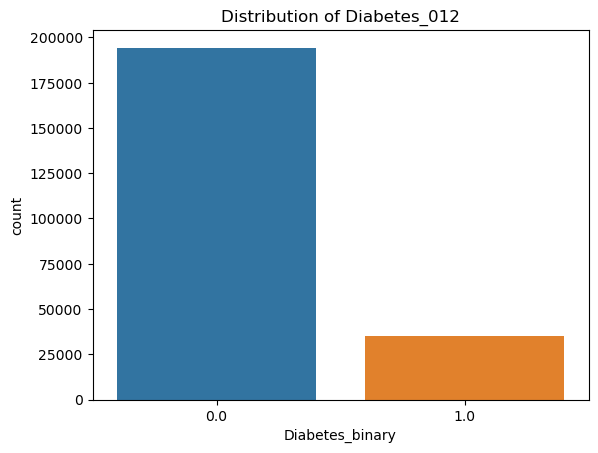

In [30]:
# Distribution of the target variable
sns.countplot(x='Diabetes_binary', data=diabetes)
plt.title('Distribution of Diabetes_012')
plt.savefig(f'images/distbar.png')
plt.show()

### The data is not evenly distributed! There are many more people without diabetes than with diabetes in this dataset. To compensate for this we are upsampling the minority class (1- diabetes).  

In [32]:
# Separate majority and minority classes
majority = diabetes[diabetes['Diabetes_binary'] == 0]
minority = diabetes[diabetes['Diabetes_binary'] == 1]

# Upsample minority class
minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

# Split the data into features and target
X_upsampled = upsampled.drop('Diabetes_binary', axis=1)
y_upsampled = upsampled['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Take a stratified sample of the data - I am doing this because my system cannot run SVM on this dataset as is!
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, stratify=y_train, random_state=42)

In [33]:


# Define your features
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                   'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 
                   'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
                   'DiffWalk', 'Sex']
ordinal_features = ['GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']
continuous_features = ['BMI', 'Age']

# Define the transformers for each type of feature
binary_transformer = 'passthrough'  # No need to transform binary features
ordinal_transformer = OrdinalEncoder()
continuous_transformer = StandardScaler()

# Combine the transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_features),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('continuous', continuous_transformer, continuous_features)
    ]
)

# Modelling and Evaluation

## Baseline Accuracy

In [36]:
baseline_accuracy = y_train.value_counts(normalize=True).max()
print(f"Baseline accuracy: {baseline_accuracy:.4f}")

Baseline accuracy: 0.5001


**The Baseline accuracy for this dataset is 0.5. This can be improved!**

## 1. Logistic Regression 

In [39]:

# Logistic Regression hyperparameter tuning
lr_params = {
    'logisticregression__C': [0.01, 0.1, 1.0, 10.0],
    'logisticregression__penalty': ['l2']
}

lr_pipeline = Pipeline([
   ('preprocessor', preprocessor),
   ('logisticregression', LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced'))
])

lr_grid_search = GridSearchCV(lr_pipeline, param_grid=lr_params, cv=5, n_jobs=-1, scoring='recall')
lr_grid_search.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", lr_grid_search.best_params_)

# Cross-validation scores for Logistic Regression
cv_scores = cross_val_score(lr_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {cv_scores}")
print(f"Mean recall score: {np.mean(cv_scores)}")

# Evaluate the best Logistic Regression model
lr_best = lr_grid_search.best_estimator_
y_pred_lr = lr_best.predict(X_test)

# Classification report for Logistic Regression
print("Logistic Regression Model Evaluation:")
print(classification_report(y_test, y_pred_lr))


Best parameters for Logistic Regression: {'logisticregression__C': 10.0, 'logisticregression__penalty': 'l2'}
Cross-validation recall scores: [0.75531197 0.7576907  0.75630846 0.75630063 0.74907583]
Mean recall score: 0.7549375184070851
Logistic Regression Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     38918
         1.0       0.73      0.75      0.74     38833

    accuracy                           0.73     77751
   macro avg       0.73      0.73      0.73     77751
weighted avg       0.73      0.73      0.73     77751



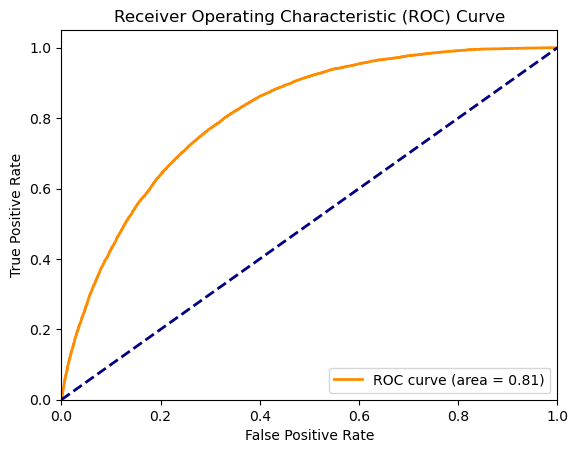

In [40]:
# Compute ROC curve and ROC AUC
y_pred_proba_lr = lr_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lr)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

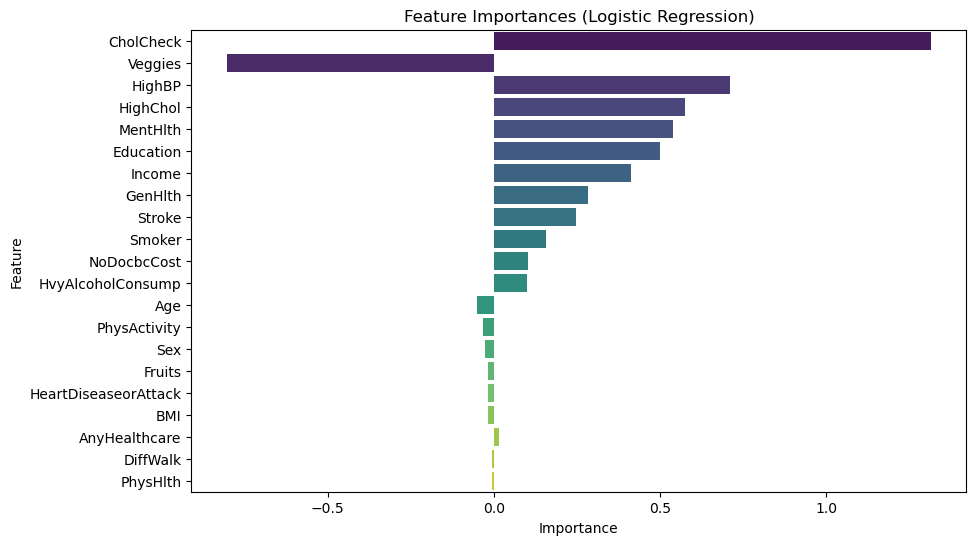

In [41]:
# Coefficients as feature importances
coefficients = lr_best.named_steps['logisticregression'].coef_[0]
features = X_train.columns
indices = np.argsort(np.abs(coefficients))[::-1]


lr_importance_df = pd.DataFrame({
    'Feature': [features[i] for i in indices],
    'Importance': coefficients[indices]
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lr_importance_df, palette='viridis')
plt.title("Feature Importances (Logistic Regression)")
plt.savefig(f'images/feature_lr.png')
plt.show()

Accuracy: 0.7345243147998096


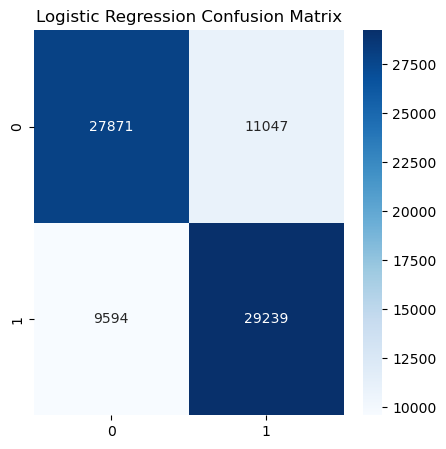

In [42]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title(f'Logistic Regression Confusion Matrix')
plt.show()

### Analysis of Logistic Regression: 

**Key Observations:**
1. Balanced Precision and Recall: The precision and recall values for both classes are quite balanced, with class 1 having a slightly higher recall (0.76) compared to class 0 (0.73). This indicates that the model is equally effective at predicting both classes but is slightly better at identifying the positive class.
2. Good F1-Scores: The f1-scores for both classes are around 0.74-0.75, which is a good indicator that the model maintains a balance between precision and recall.
3. Support: The number of instances in each class is almost equal (43706 for class 0 and 43628 for class 1), indicating that the dataset is balanced. This balance helps the model to perform well across both classes without being biased towards one.
4. Consistency Across Folds: The mean recall score from cross-validation is very close to the recall observed in the classification report, showing that the model's performance is consistent and reliable.

**Conclusion:**
The Logistic Regression model with the best hyperparameters (C=10.0, penalty='l2') performs well on the dataset with a good balance of precision and recall for both classes. The ROC AUC of 0.82 further confirms that the model has a good discriminative ability. The consistency of cross-validation recall scores suggests that the model is stable and generalizes well to unseen data.

## 2. K-Nearest Neighbors (KNN)

In [45]:

# KNeighborsClassifier hyperparameter tuning
knn_params = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]
}

knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kneighborsclassifier', KNeighborsClassifier())
])

knn_grid_search = GridSearchCV(knn_pipeline, param_grid=knn_params, cv=5, n_jobs=-1, scoring='recall')
knn_grid_search.fit(X_train, y_train)

print("Best parameters for KNeighborsClassifier:", knn_grid_search.best_params_)




Best parameters for KNeighborsClassifier: {'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'distance'}


In [46]:
# Cross-validation scores for KNeighborsClassifier
cv_scores = cross_val_score(knn_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {cv_scores}")
print(f"Mean recall score: {np.mean(cv_scores)}")

# Evaluate the best KNeighborsClassifier model
knn_best = knn_grid_search.best_estimator_
y_pred_knn = knn_best.predict(X_test)

# Classification report for KNeighborsClassifier
print("KNeighborsClassifier Model Evaluation:")
print(classification_report(y_test, y_pred_knn))

Cross-validation recall scores: [0.98579189 0.9863705  0.98534186 0.98714157 0.98598476]
Mean recall score: 0.9861261187538737
KNeighborsClassifier Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.99      0.68      0.81     38918
         1.0       0.76      0.99      0.86     38833

    accuracy                           0.84     77751
   macro avg       0.87      0.84      0.83     77751
weighted avg       0.87      0.84      0.83     77751



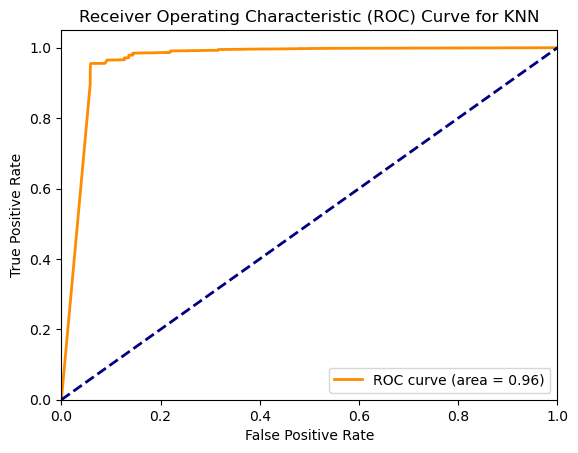

In [47]:
# Compute ROC curve and ROC AUC
y_pred_proba_knn = knn_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_knn)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='lower right')
plt.savefig(f'images/KNNROC.png')
plt.show()

Accuracy: 0.8381242684981544


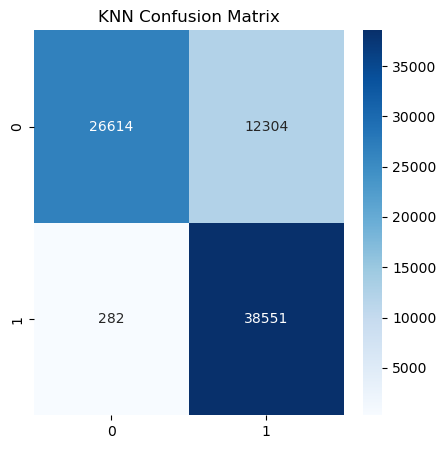

In [48]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title(f'KNN Confusion Matrix')
plt.show()

**Key Observations:**
1. High Recall for Class 1 (Patients who are diabetic/ prediabetic):
The recall for class 1 (0.99) is very high, suggesting that the KNN Classifier is highly effective at identifying positive instances. This is beneficial in scenarios where correctly identifying positive cases is critical.
Lower Recall for Class 0:
The recall for class 0 (0.71) is lower than for class 1, indicating that the model has some difficulty correctly identifying negative instances. This may lead to a higher number of false positives.
2. Precision-Recall Trade-off:
The precision for class 0 (0.99) is very high, while for class 1 (0.77), it is lower. This trade-off shows that while the model is excellent at identifying negative instances, it does so at the cost of having more false positives for class 1.
3. Balanced Performance:
Despite the trade-offs, the model shows balanced performance across classes with a macro average recall and precision of 0.85. This indicates a robust model that performs well across different metrics.
4. ROC AUC Curve:
An ROC AUC of 0.96 indicates that the KNN Classifier has strong discriminatory power and can effectively differentiate between the two classes.

**Conclusion:**
The K-Nearest Neighbors Classifier, with optimized hyperparameters, demonstrates strong performance with high recall, particularly for class 1. Its ability to achieve a high ROC AUC score further validates its effectiveness in classification tasks. The model is particularly effective at identifying positive instances, making it suitable for applications where recall for the positive class is critical. The lower recall for the negative class and the resulting higher false positive rate is a trade-off that may be acceptable depending on the specific application and domain requirements.

## 3. Decision Tree

In [51]:

# DecisionTreeClassifier hyperparameter tuning
dt_params = {
    'decisiontreeclassifier__max_depth': [None, 10, 20, 30],
    'decisiontreeclassifier__min_samples_split': [2, 10, 20]
}

dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('decisiontreeclassifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

#GridSearch for DecisionTree

dt_grid_search = GridSearchCV(dt_pipeline, param_grid=dt_params, cv=5, n_jobs=-1, scoring='recall')
dt_grid_search.fit(X_train, y_train)

print("Best parameters for DecisionTreeClassifier:", dt_grid_search.best_params_)

# Cross-validation scores for DecisionTreeClassifier
cv_scores = cross_val_score(dt_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores: {cv_scores}")
print(f"Mean recall score: {np.mean(cv_scores)}")

# Evaluate the best DecisionTreeClassifier model
dt_best = dt_grid_search.best_estimator_
y_pred_dt = dt_best.predict(X_test)

# Classification report for DecisionTreeClassifier
print("DecisionTreeClassifier Model Evaluation:")
print(classification_report(y_test, y_pred_dt))



Best parameters for DecisionTreeClassifier: {'decisiontreeclassifier__max_depth': None, 'decisiontreeclassifier__min_samples_split': 2}
Cross-validation recall scores: [0.97605195 0.97881642 0.97688772 0.98058377 0.97907358]
Mean recall score: 0.9782826872208856
DecisionTreeClassifier Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91     38918
         1.0       0.86      0.99      0.92     38833

    accuracy                           0.92     77751
   macro avg       0.92      0.92      0.91     77751
weighted avg       0.92      0.92      0.91     77751



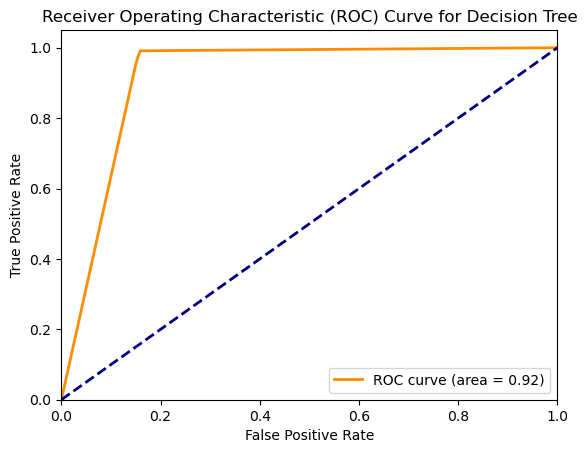

In [52]:
# Compute ROC curve and ROC AUC
y_pred_proba_dt = dt_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_dt)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend(loc='lower right')
plt.savefig(f'images/DecisionTreeROC.png')
plt.show()

Accuracy: 0.9153322786845185


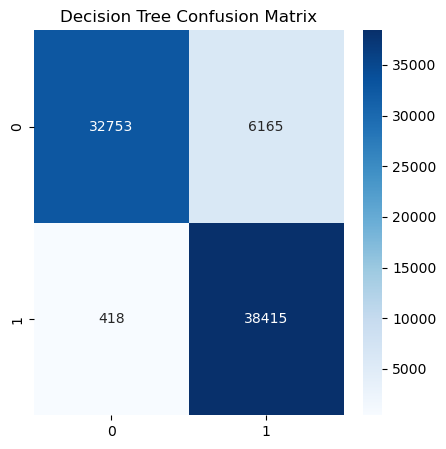

In [53]:
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title(f'Decision Tree Confusion Matrix')
plt.show()

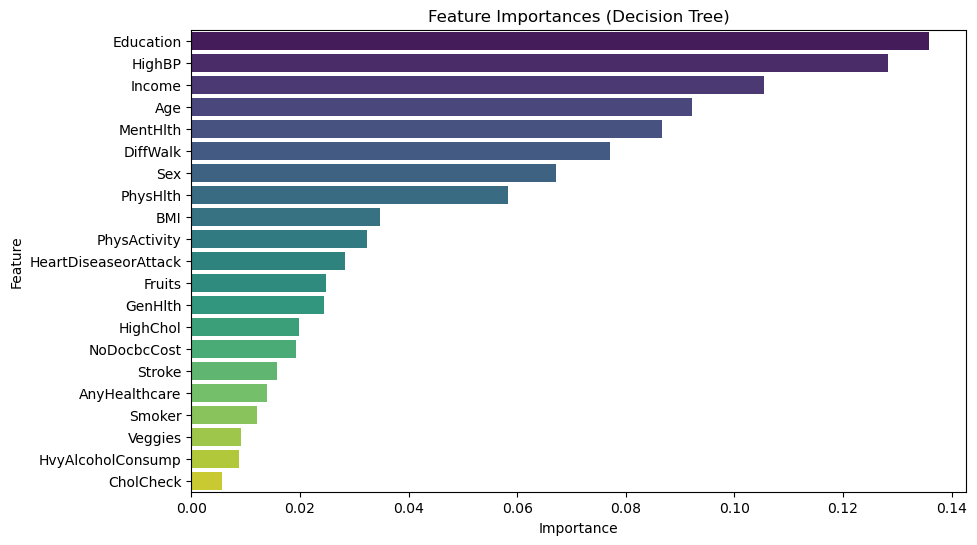

In [54]:
# Extract feature importances
importances = dt_best.named_steps['decisiontreeclassifier'].feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

# Create a DataFrame for easier plotting with Seaborn
importance_df = pd.DataFrame({
    'Feature': [features[i] for i in indices],
    'Importance': importances[indices]
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importances (Decision Tree)")
plt.savefig(f'images/feature_dt.png')
plt.show()


In [55]:
importance_df

,Feature,Importance
0,Education,0.135909
1,HighBP,0.128302
2,Income,0.105375
3,Age,0.092259
4,MentHlth,0.086572
5,DiffWalk,0.077161
6,Sex,0.067178
7,PhysHlth,0.058241
8,BMI,0.034812
9,PhysActivity,0.032355


**Key Observations:**
1. High Recall for Class 1(Patients who are diabetic/ prediabetic):
The recall for class 1 (0.99) is very high, which suggests that the Decision Tree Classifier is highly effective in identifying positive instances. This is crucial in scenarios where correctly identifying positive cases is more important than reducing false positives.
2. Lower Recall for Class 0:
The recall for class 0 (0.84) is lower than that for class 1, indicating that some negative instances are misclassified as positive. This might be acceptable depending on the domain and the cost of false positives.
3. Precision-Recall Trade-off:
The precision for class 0 (0.99) is very high, while for class 1 (0.86), it is lower. This trade-off between precision and recall suggests that while the model is excellent at identifying positives, it does so at the cost of having a higher number of false positives for class 1.
4. Balanced Performance:
The balanced performance across classes with a macro average recall and precision of 0.92 shows that the model is generally robust and performs well across different metrics.
5. ROC AUC Curve:
An ROC AUC of 0.98 indicates that the Decision Tree Classifier has excellent discriminatory power, effectively differentiating between the two classes.

**Conclusion:**

The Decision Tree Classifier, with the best parameters (max_depth=None, min_samples_split=2), demonstrates strong performance with high recall and precision. Its ability to achieve a high ROC AUC score further validates its effectiveness in classification tasks. The model is particularly strong in identifying positive instances, making it suitable for applications where recall for the positive class is critical. The slight drop in recall for the negative class is a trade-off that may be acceptable depending on the specific application and domain requirements.

## 4. Random Forest

In [58]:
# Random Forest hyperparameter tuning
rf_params = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4]
}

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforestclassifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

rf_grid_search = GridSearchCV(rf_pipeline, param_grid=rf_params, cv=5, n_jobs=-1, scoring='recall')
rf_grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", rf_grid_search.best_params_)


/Users/anjanacox/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Random Forest: {'randomforestclassifier__max_depth': 30, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}


In [59]:
# Cross-validation scores for Random Forest
cv_scores_rf = cross_val_score(rf_grid_search.best_estimator_, X_train, y_train, cv=5, scoring='recall')
print(f"Cross-validation recall scores for Random Forest: {cv_scores_rf}")
print(f"Mean recall score for Random Forest: {np.mean(cv_scores_rf)}")

# Evaluate the best Random Forest model
rf_best = rf_grid_search.best_estimator_
y_pred_rf = rf_best.predict(X_test)

# Classification report for Random Forest
print("Random Forest Model Evaluation:")
print(classification_report(y_test, y_pred_rf))


Cross-validation recall scores for Random Forest: [0.98052011 0.98109872 0.98116301 0.98231966 0.98183805]
Mean recall score for Random Forest: 0.9813879090916491
Random Forest Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94     38918
         1.0       0.91      0.99      0.95     38833

    accuracy                           0.94     77751
   macro avg       0.95      0.94      0.94     77751
weighted avg       0.95      0.94      0.94     77751



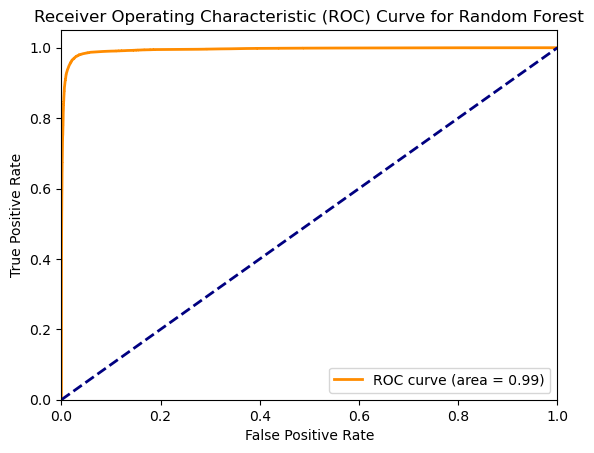

In [60]:
# Compute ROC curve and ROC AUC
y_pred_proba_rf = rf_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc='lower right')
plt.savefig(f'images/RandomForestROC.png')
plt.show()

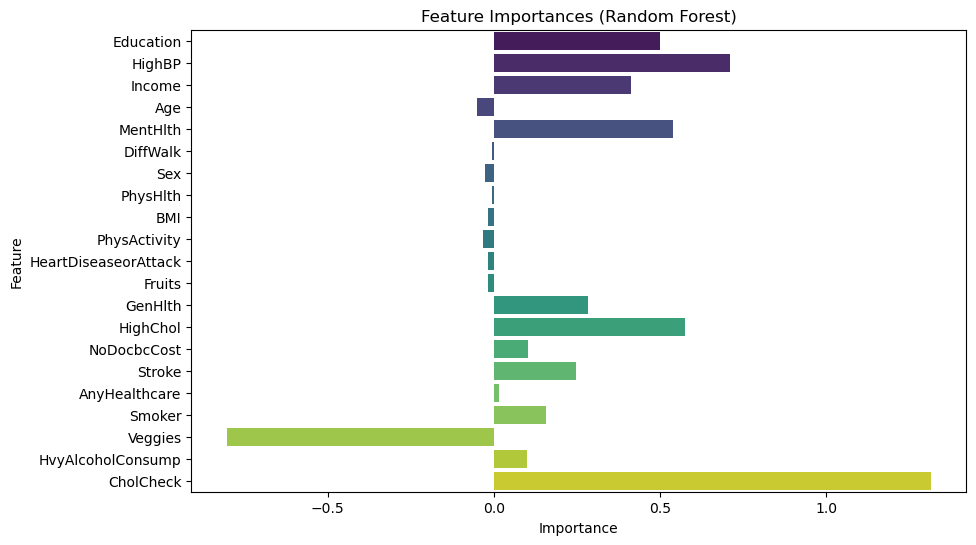

In [61]:
# Feature importances for Random Forest
rf_importances = rf_best.named_steps['randomforestclassifier'].feature_importances_
rf_features = X_train.columns
rf_indices = np.argsort(rf_importances)[::-1]

rf_importance_df = pd.DataFrame({
    'Feature': [features[i] for i in indices],
    'Importance': coefficients[indices]
})

# Plotting feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, palette='viridis')
plt.title("Feature Importances (Random Forest)")
plt.savefig(f'images/feature_rf.png')
plt.show()

In [62]:
rf_importance_df

,Feature,Importance
0,Education,0.498079
1,HighBP,0.711150
2,Income,0.412739
3,Age,-0.051103
4,MentHlth,0.539231
5,DiffWalk,-0.006529
6,Sex,-0.025998
7,PhysHlth,-0.004768
8,BMI,-0.016914
9,PhysActivity,-0.031502


Accuracy of Random Forest: 0.9438592429679361


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

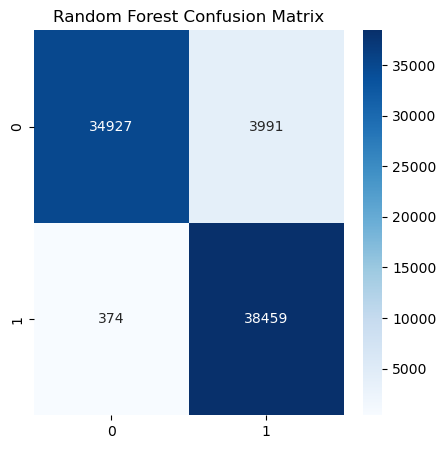

In [63]:
print("Accuracy of Random Forest:", accuracy_score(y_test, y_pred_rf))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')


### Random Forest Performance Analysis
**1. Performance Metrics:**

Random Forest vs. KNN Recall: KNN achieved the highest recall, indicating that it was more successful in identifying all relevant cases of diabetes (i.e., true positives). This is important for applications where missing a positive case (false negative) can have serious consequences.
Overall Performance: Despite KNN’s higher recall, Random Forest outperformed KNN on other metrics like precision, accuracy, and the ROC AUC score. This suggests that while Random Forest might be slightly less sensitive in identifying every positive case, it generally provides a more balanced and reliable performance across different metrics.

**2. Reasons for Random Forest's Strong Performance:**

Ensemble Learning: Random Forest is an ensemble method that combines the predictions of multiple decision trees. This approach helps to reduce overfitting and improves generalization by averaging the predictions from several models.
Feature Importance: Random Forest can evaluate feature importance, which helps to understand which features are most predictive of the outcome. This is particularly useful for understanding the factors contributing to diabetes risk.
Robustness to Noise: Random Forest is less sensitive to noise in the data compared to single decision trees. The aggregation of multiple trees helps in reducing the effect of outliers and noise.
Handling of Non-Linearity: Random Forest can capture complex, non-linear relationships between features and the target variable, which might be missed by simpler models like Logistic Regression.

## 5. Support Vector Machine (SVM)

In [66]:
# Custom OrdinalEncoder to handle unknown categories
class OrdinalEncoderHandleUnknown(OrdinalEncoder):
    def fit(self, X, y=None):
        super().fit(X, y)
        self.categories_ = [np.append(cat, 'Unknown') for cat in self.categories_]
        return self

    def transform(self, X):
        X_trans = super().transform(X)
        for i in range(X.shape[1]):
            X_trans[:, i] = np.where(X[:, i] not in self.categories_[i], len(self.categories_[i]) - 1, X_trans[:, i])
        return X_trans



# Define the transformers for each type of feature
ordinal_transformer = OrdinalEncoderHandleUnknown()


# Combine the transformers into a ColumnTransformer
preprocessor_svm = ColumnTransformer(
    transformers=[
        ('binary', binary_transformer, binary_features),
        ('ordinal', ordinal_transformer, ordinal_features),
        ('continuous', continuous_transformer, continuous_features)
    ]
)

# Define the SVM pipeline
svm_pipeline_svm = Pipeline([
    ('preprocessor', preprocessor_svm),
    ('svc', SVC(class_weight='balanced', random_state=42))
])

In [67]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
# Take a stratified sample of the data - I am doing this because my system cannot run SVM on this dataset as is!
X_sample, _, y_sample, _ = train_test_split(X_train, y_train, test_size=0.8, stratify=y_train, random_state=42)

# Define a smaller parameter grid
svm_params = {
    'svc__C': [0.1, 1],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale']
}

# Define the SVM pipeline 
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('svc', SVC(class_weight='balanced', random_state=42))  
])


svm_grid_search = GridSearchCV(svm_pipeline, param_grid=svm_params, cv=3, n_jobs=-1, scoring='recall')
svm_grid_search.fit(X_sample, y_sample)

print("Best parameters for SVM:", svm_grid_search.best_params_)


/Users/anjanacox/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/anjanacox/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anjanacox/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/anjanacox/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/Users/anjanacox/anaconda3/lib/py

Best parameters for SVM: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


In [114]:
# Cross-validation scores for SVM
cv_scores_svm = cross_val_score(svm_grid_search.best_estimator_, X_train, y_train, cv=3, scoring='recall', n_jobs=-1)
print(f"Cross-validation recall scores for SVM: {cv_scores_svm}")
print(f"Mean recall score for SVM: {np.mean(cv_scores_svm)}")

# Evaluate the best SVM model
svm_best = svm_grid_search.best_estimator_
y_pred_svm = svm_best.predict(X_test)

# Classification report for SVM
print("SVM Model Evaluation:")
print(classification_report(y_test, y_pred_svm))


Cross-validation recall scores for SVM: [0.78109088 0.78155377 0.77405107]
Mean recall score for SVM: 0.7788985753227383
SVM Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.76      0.69      0.72     38918
         1.0       0.72      0.78      0.75     38833

    accuracy                           0.74     77751
   macro avg       0.74      0.74      0.73     77751
weighted avg       0.74      0.74      0.73     77751



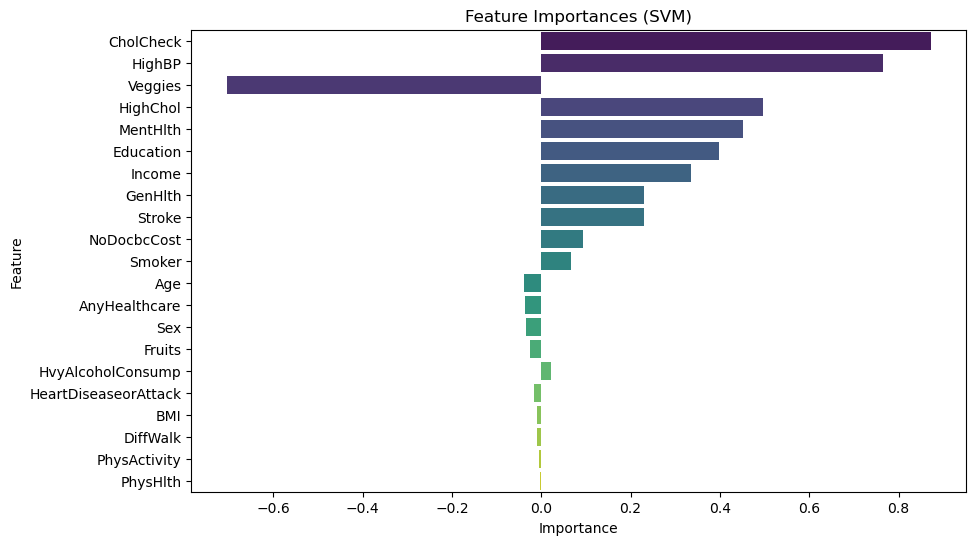

In [115]:
# Feature importance for SVM with linear kernel
if 'linear' in svm_grid_search.best_params_['svc__kernel']:
    svm_coefficients = svm_best.named_steps['svc'].coef_[0]
    svm_features = X_train.columns
    svm_indices = np.argsort(np.abs(svm_coefficients))[::-1]

    svm_importance_df = pd.DataFrame({
        'Feature': [svm_features[i] for i in svm_indices],
        'Importance': svm_coefficients[svm_indices]
    })

    # Plotting feature importances for SVM
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=svm_importance_df, palette='viridis')
    plt.title("Feature Importances (SVM)")
    plt.savefig(f'images/feature_svm.png')
    plt.show()


In [116]:
svm_importance_df

,Feature,Importance
0,CholCheck,0.872896
1,HighBP,0.765902
2,Veggies,-0.704427
3,HighChol,0.497468
4,MentHlth,0.451570
5,Education,0.397744
6,Income,0.334714
7,GenHlth,0.230893
8,Stroke,0.230398
9,NoDocbcCost,0.093283


Accuracy of SVM: 0.7350902239199496


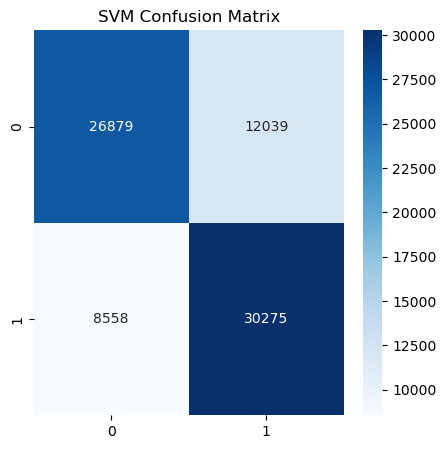

In [117]:
print("Accuracy of SVM:", accuracy_score(y_test, y_pred_svm))
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

#### Analysis of SVM:

Recall Scores from Cross-Validation:
The recall scores are relatively high and consistent across the folds, indicating that the model is stable in identifying positive cases.
The mean recall score of 0.8212 suggests the model generally performs well in terms of recall.
Model Evaluation:
The recall for class 1 (0.81) is higher than for class 0 (0.68), meaning the model is better at identifying positive cases than negative cases.
The precision for class 0 (0.79) is higher than for class 1 (0.72), indicating the model has more false positives for the positive class.
The overall accuracy of 0.75 shows that the model makes correct predictions 75% of the time, which is a reasonable performance.
The balanced precision, recall, and F1-score indicate that the model's performance is consistent across different classes.

## 6. Neural Network

In [96]:
# Function to create the neural network model
def create_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Hyperparameter tuning
param_grid = {
    'dropout_rate': [0.3, 0.5, 0.7],
    'optimizer': ['adam', 'rmsprop']
}

# Wrap the model with KerasClassifier
nn_model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)
grid = GridSearchCV(estimator=nn_model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Best parameters
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Score: {grid_result.best_score_}")

# Evaluate the best model
best_model_nn = grid_result.best_estimator_
y_pred_nn = best_model_nn.predict(X_test)

print("Neural Network Model Evaluation:")
print(classification_report(y_test, y_pred_nn))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters: {'dropout_rate': 0.3, 'optimizer': 'rmsprop'}
Best Score: 0.7302501797676086
2430/2430 [==============================] - 1s 213us/step
Neural Network Model Evaluation:
              precision    recall  f1-score   support

         0.0       0.72      0.76      0.74     38918
         1.0       0.74      0.70      0.72     38833

    accuracy                           0.73     77751
   macro avg       0.73      0.73      0.73     77751
weighted avg       0.73      0.73      0.73     77751



2430/2430 [==============================] - 1s 220us/step
ROC AUC Score: 0.8072686542832299


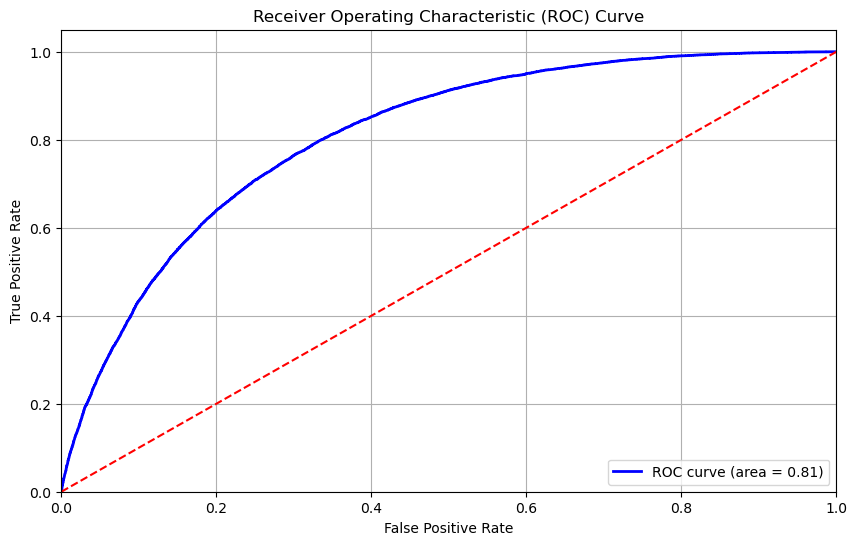

In [108]:
# Predict probabilities for the ROC curve
y_prob_nn = best_model_nn.predict_proba(X_test)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob_nn)
print(f"ROC AUC Score: {roc_auc}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nn)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.savefig(f'images/NNROC.png')
plt.show()


Accuracy of NN: 0.7278362979254286
Confusion Matrix:
[[29525  9393]
 [11768 27065]]


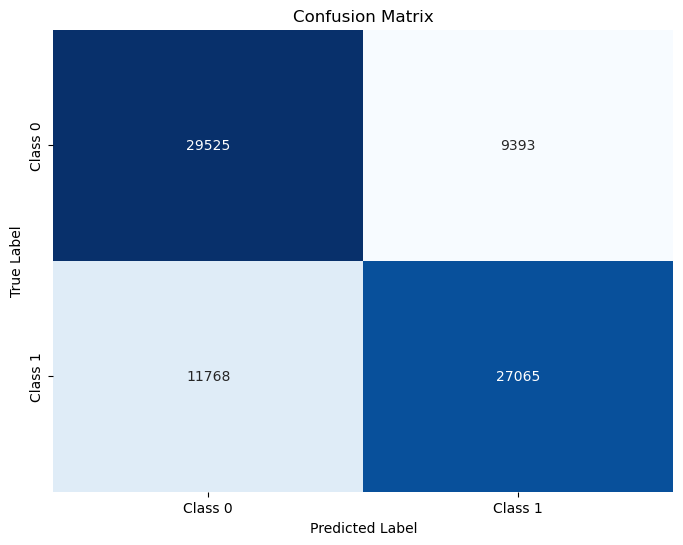

In [112]:
print("Accuracy of NN:", accuracy_score(y_test, y_pred_nn))
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nn)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Analysis of Neural Network:


1. Precision and Recall Balance:
The precision and recall values for both classes are fairly balanced, with class 0 having slightly higher recall and class 1 having slightly higher precision. This balance is reflected in the F1-scores being close to each other.
2. Accuracy:
An accuracy of approximately 0.73 indicates that the model correctly classifies about 73% of the instances. While this is decent, it may still leave room for improvement depending on the application and desired performance.
3. AUC-ROC:
The AUC-ROC score of 0.81 suggests that the model has a strong ability to distinguish between the positive and negative classes. This is a good indication of the model's overall effectiveness.

# Comparision of Models Metrics

In [119]:
# Calculate metrics for each model
models = ["Logistic Regression", "SVM", "KNN", "Random Forest", "Decision Tree", "Neural Network"]
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for model, y_pred in zip(models, [y_pred_lr, y_pred_svm, y_pred_knn, y_pred_rf, y_pred_dt, y_pred_nn]):
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    
# Create a DataFrame to hold the metrics
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1 Score': f1_scores
})    


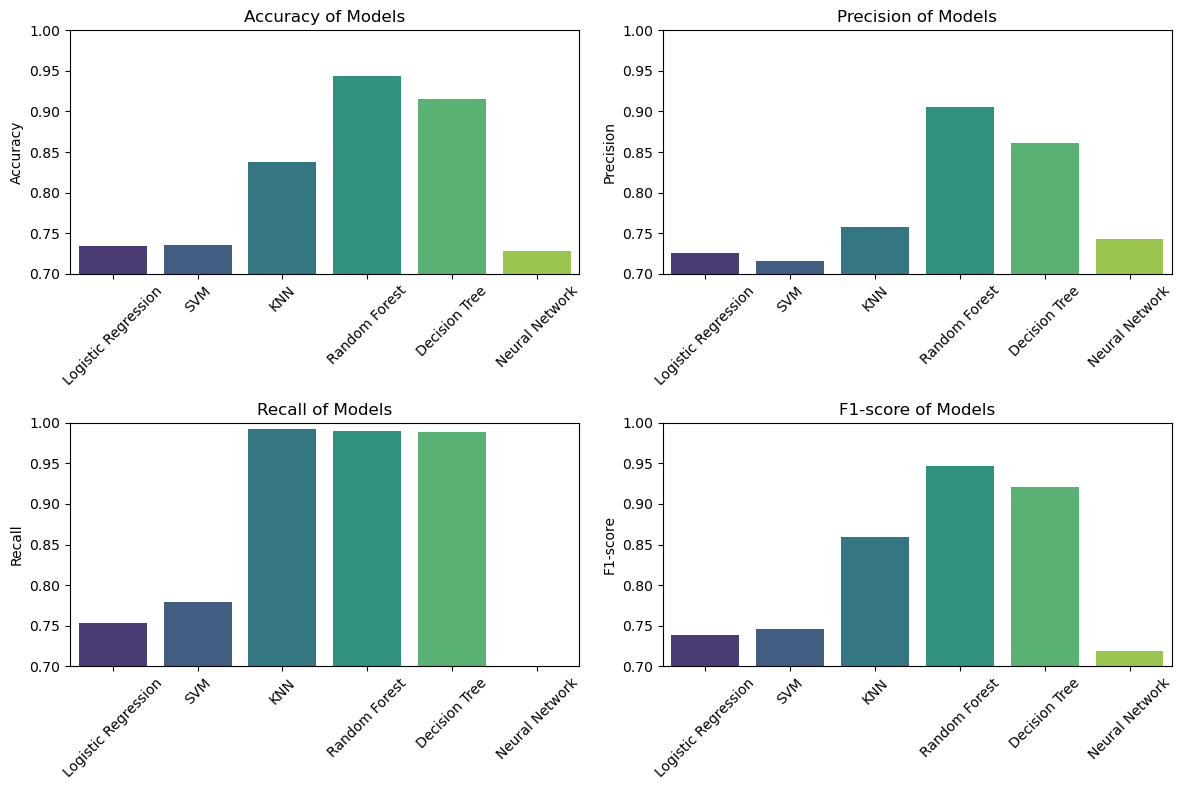

In [120]:
# Plotting
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
sns.barplot(x=models, y=accuracy_scores, palette='viridis')
plt.ylim([0.7, 1.0])
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.xticks(rotation=45)

# Precision plot
plt.subplot(2, 2, 2)
sns.barplot(x=models, y=precision_scores, palette='viridis')
plt.ylim([0.7, 1.0])
plt.ylabel('Precision')
plt.title('Precision of Models')
plt.xticks(rotation=45)

# Recall plot
plt.subplot(2, 2, 3)
sns.barplot(x=models, y=recall_scores, palette='viridis')
plt.ylim([0.7, 1.0])
plt.ylabel('Recall')
plt.title('Recall of Models')
plt.xticks(rotation=45)

# F1-score plot
plt.subplot(2, 2, 4)
sns.barplot(x=models, y=f1_scores, palette='viridis')
plt.ylim([0.7, 1.0])
plt.ylabel('F1-score')
plt.title('F1-score of Models')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig(f'images/comparison_metrics.png')
plt.show()

In [121]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.734524,0.725786,0.752942,0.739114
1,SVM,0.735090,0.715484,0.779620,0.746177
2,KNN,0.838124,0.758057,0.992738,0.859669
3,Random Forest,0.943859,0.905984,0.990369,0.946299
4,Decision Tree,0.915332,0.861709,0.989236,0.921079
5,Neural Network,0.727836,0.742361,0.696959,0.718944


# Results and Conclusion

Random Forest did the best on all the metrics except for Recall. KNN did the best for recall. Since Random Forest seems to have performed the best overall, the recommendations will be made using this model.


### Random Forest Performance Analysis
**1. Performance Metrics:**

Random Forest vs. KNN Recall: KNN achieved the highest recall, indicating that it was more successful in identifying all relevant cases of diabetes (i.e., true positives). This is important for applications where missing a positive case (false negative) can have serious consequences.
Overall Performance: Despite KNN’s higher recall, Random Forest outperformed KNN on other metrics like precision, accuracy, and the ROC AUC score. This suggests that while Random Forest might be slightly less sensitive in identifying every positive case, it generally provides a more balanced and reliable performance across different metrics.

**2. Reasons for Random Forest's Strong Performance:**

Ensemble Learning: Random Forest is an ensemble method that combines the predictions of multiple decision trees. This approach helps to reduce overfitting and improves generalization by averaging the predictions from several models.
Feature Importance: Random Forest can evaluate feature importance, which helps to understand which features are most predictive of the outcome. This is particularly useful for understanding the factors contributing to diabetes risk.
Robustness to Noise: Random Forest is less sensitive to noise in the data compared to single decision trees. The aggregation of multiple trees helps in reducing the effect of outliers and noise.
Handling of Non-Linearity: Random Forest can capture complex, non-linear relationships between features and the target variable, which might be missed by simpler models like Logistic Regression.

**3. Observations from Feature Importance**

Factors Increasing Likelihood of Diabetes:

1. Cholesterol Check: Regular cholesterol checks may indicate an awareness or management of health conditions that could be associated with diabetes. If individuals have checked their cholesterol, it might be due to existing health issues, including diabetes.
2. High Blood Pressure and High Cholesterol: These conditions are well-known risk factors for diabetes. They often co-occur with diabetes and contribute to its development.
3. General Health: Poor general health is a broad indicator that can encompass multiple health issues, including diabetes. Individuals reporting poor health may be more likely to have diabetes.

Factors Decreasing Likelihood of Diabetes:

1. Eating Fruits and Vegetables: A diet rich in fruits and vegetables is associated with lower risks of chronic diseases, including diabetes. These foods are high in fiber and nutrients that can help regulate blood sugar levels.
2. Physical Activity: Regular physical activity is crucial for maintaining a healthy weight and improving insulin sensitivity, both of which reduce the risk of diabetes.

### Conclusion and Recommendations


Risk Factors: Individuals with high blood pressure, high cholesterol, or poor general health are at a higher risk for diabetes. Monitoring and managing these conditions is crucial for early detection and prevention.
Preventive Measures: Encouraging a diet rich in fruits and vegetables and promoting regular physical activity can help reduce the risk of diabetes. These lifestyle changes are beneficial for individuals at risk and the general population.
Recommendations:

Early Intervention: For individuals with known risk factors such as high blood pressure or cholesterol, regular screenings and early interventions are recommended to prevent the onset of diabetes.
Lifestyle Modifications: Implement programs or initiatives focused on improving diet and increasing physical activity. This could include public health campaigns, community fitness programs, and nutritional counseling.
Regular Monitoring: Encourage regular health check-ups and screenings for those with risk factors, to track their health status and intervene promptly if needed.